In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Dummy Data for HR dashboard-20200703.xlsx")

In [3]:
df['Termination Date']

0       2019-05-15
1              NaT
2              NaT
3              NaT
4              NaT
           ...    
15262   2019-06-29
15263          NaT
15264   2019-09-14
15265          NaT
15266          NaT
Name: Termination Date, Length: 15267, dtype: datetime64[ns]

In [4]:
df['Termination'] = df['Termination Date'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [5]:
df['Termination']

0        1
1        0
2        0
3        0
4        0
        ..
15262    1
15263    0
15264    1
15265    0
15266    0
Name: Termination, Length: 15267, dtype: int64

In [6]:
df=df[['Gender', 'Age Banding', 'Generation', 'Education Degree',
       'Length of Service', 'Tenure Banding','Employment Status', 
       'FTE','Full Time / Part Time','Job Level','Business Unit',
       'Country','Location',
       'Promotion (Level Change in Quarter)', 'Promotion (Level Change in Month)',
       'Demotion (Level Change in Quarter)', 'Demotion (Level Change in Month)',
       'Base Salary','Total Salary Cost', 'Termination']]

In [7]:
gender=pd.get_dummies(df['Gender'])
gender.columns=['Gender : Female', 'Gender : Male', 'Gender : U']

agebanding=pd.get_dummies(df['Age Banding'])
agebanding.columns=['Age Banding : 20-', 'Age Banding : 20-30', 'Age Banding : 30-40', 'Age Banding : 40-50', 'Age Banding : 50-60', 'Age Banding : 60+']

generation=pd.get_dummies(df['Generation'])
generation.columns=['Generation : 0', 'Generation : Baby Boomer', 'Generation : Gen X', 'Generation : Gen i', 'Generation : Millennial']

educationdegree=pd.get_dummies(df['Education Degree'])
educationdegree.columns=['Education Degree : Bachelor', 'Education Degree: Diploma', 'Education Degree: MBA', 'Education Degree: Master', 'Education Degree: Postgraduate Certificate']

tenurebanding=pd.get_dummies(df['Tenure Banding'])
tenurebanding.columns=['Tenure Banding : 1-3 years', 'Tenure Banding : 10-20 years', 'Tenure Banding : 20+', 'Tenure Banding : 3-5 years', 'Tenure Banding : 5-10 years',
'Tenure Banding : Less than 1 year']

employmentstatus=pd.get_dummies(df['Employment Status'])
employmentstatus.columns=['Employment Status : Casual', 'Employment Status : Contract', 'Employment Status : Fixed term', 'Employment Status : Regular']


fulltime_parttime=pd.get_dummies(df['Full Time / Part Time'])

businessunit=pd.get_dummies(df['Business Unit'])
businessunit.columns=['Business Unit : Finance', 'Business Unit : HR', 'Business Unit : Management Office', 'Business Unit : Marketing', 'Business Unit : Operations',
       'Business Unit : Production 1', 'Business Unit : Production 2', 'Business Unit : Production 3', 'Business Unit : R&D', 'Business Unit : Sales',
       'Business Unit : Supply']

country=pd.get_dummies(df['Country'])
country.columns=['Country : Australia', 'Country : New Zealand']

location=pd.get_dummies(df['Location'])
location.columns=['Location : AUS - Adelaide', 'Location : AUS - Brisbane', 'Location : AUS - Melbourne', 'Location : AUS - Perth',
       'Location : AUS - Sydney', 'Location : NZL - Auckland', 'Location : NZL - Christchurch',
       'Location : NZL - Wellington']

In [8]:
df=pd.concat([df,gender,agebanding,generation,educationdegree,tenurebanding,employmentstatus,fulltime_parttime,businessunit,country,location],axis=1)

In [9]:
df.drop(['Gender', 'Age Banding', 'Generation', 'Education Degree',
        'Tenure Banding','Employment Status', 
       'Full Time / Part Time','Business Unit',
       'Country','Location'],axis=1, inplace=True)

In [10]:
df.columns

Index(['Length of Service', 'FTE', 'Job Level',
       'Promotion (Level Change in Quarter)',
       'Promotion (Level Change in Month)',
       'Demotion (Level Change in Quarter)',
       'Demotion (Level Change in Month)', 'Base Salary', 'Total Salary Cost',
       'Termination', 'Gender : Female', 'Gender : Male', 'Gender : U',
       'Age Banding : 20-', 'Age Banding : 20-30', 'Age Banding : 30-40',
       'Age Banding : 40-50', 'Age Banding : 50-60', 'Age Banding : 60+',
       'Generation : 0', 'Generation : Baby Boomer', 'Generation : Gen X',
       'Generation : Gen i', 'Generation : Millennial',
       'Education Degree : Bachelor', 'Education Degree: Diploma',
       'Education Degree: MBA', 'Education Degree: Master',
       'Education Degree: Postgraduate Certificate',
       'Tenure Banding : 1-3 years', 'Tenure Banding : 10-20 years',
       'Tenure Banding : 20+', 'Tenure Banding : 3-5 years',
       'Tenure Banding : 5-10 years', 'Tenure Banding : Less than 1 year',
  

In [11]:
round(100*df.groupby('Termination').count()['FTE'].iloc[1]/df.shape[0],ndigits=1)

20.5

##### Visualization of All Influencing Parameters

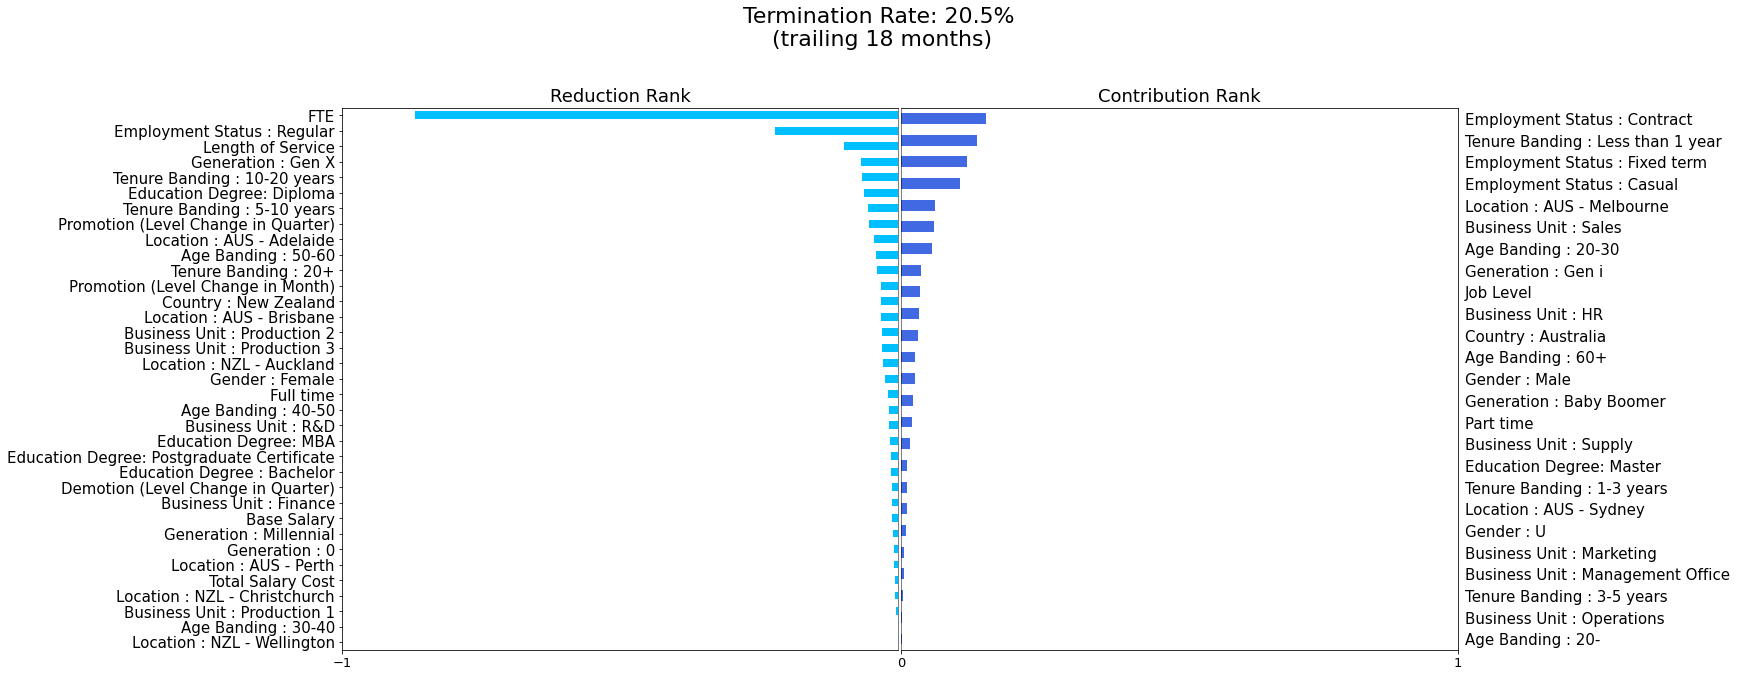

In [14]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.005, hspace=0.005)# Decreases the gap between bar charts.

ax1=plt.subplot(2,2,1)
df.corr()[df.corr()['Termination']<0]['Termination'].sort_values(ascending=False).plot(kind='barh', color='deepskyblue')
plt.xlim(-1,0)
plt.xticks(ticks=[-1],fontsize=13)
plt.yticks(fontsize=15)
plt.title('Reduction Rank', fontsize=18)
plt.suptitle('Termination Rate: 20.5% \n(trailing 18 months)',y=0.95,x=0.5, fontsize=22)
ax1.spines['right'].set_linewidth(0.5)# Creates a line between bar charts.

ax2=plt.subplot(2,2,2)
df.corr()[df.corr()['Termination']>0]['Termination'].sort_values(ascending=True).drop('Termination').plot(kind='barh', color='royalblue')
ax2.tick_params(right=False, left=False,labelleft=False, labelright=True)# Let the horizontal axes labeling appear on right.
plt.yticks(fontsize=15)
plt.xticks(ticks=[0,1],fontsize=13)
plt.xlim(0,1)
plt.title('Contribution Rank', fontsize=18)
ax2.spines['left'].set_linewidth(0.5)# Creates a line between bar charts.

plt.show()

##### Visualization of the Top 10 Important Parameters

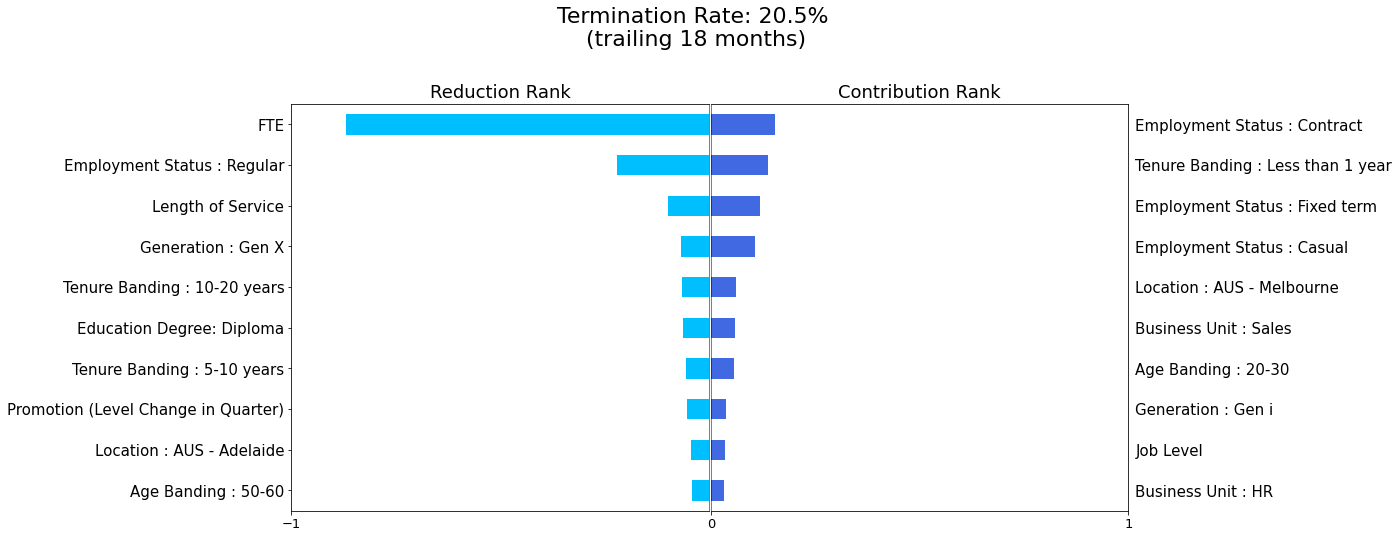

In [15]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.005, hspace=0.005)# Decreases the gap between bar charts.

ax1=plt.subplot(2,2,1)
df.corr()[df.corr()['Termination']<0]['Termination'].sort_values(ascending=False).tail(10).plot(kind='barh', color='deepskyblue')
plt.xlim(-1,0)
plt.xticks(ticks=[-1],fontsize=13)
plt.yticks(fontsize=15)
plt.title('Reduction Rank', fontsize=18)
plt.suptitle('Termination Rate: 20.5% \n(trailing 18 months)',y=0.97,x=0.5, fontsize=22)
ax1.spines['right'].set_linewidth(0.5)# Creates a line between bar charts.

ax2=plt.subplot(2,2,2)
df.corr()[df.corr()['Termination']>0]['Termination'].sort_values(ascending=True).drop('Termination').tail(10).plot(kind='barh', color='royalblue')
ax2.tick_params(right=False, left=False,labelleft=False, labelright=True)# Let the horizontal axes labeling appear on right.
plt.yticks(fontsize=15)
plt.xticks(ticks=[0,1],fontsize=13)
plt.xlim(0,1)
plt.title('Contribution Rank', fontsize=18)
ax2.spines['left'].set_linewidth(0.5)# Creates a line between bar charts.

plt.show()